In [2]:
import pandas as pd
import polars as pl 
import datetime
import os
import plotly.express as px
import matplotlib.pyplot as plt

In [3]:
#definitions
df_info = pl.read_csv(r'homecredit_csv_files/feature_definitions.csv')


In [4]:
def set_table_dtypes(df: pl.DataFrame) -> pl.DataFrame:
    # implement here all desired dtypes for tables
    # the following is just an example
    for col in df.columns:
        # last letter of column name will help you determine the type
        if col[-1] in ("P", "A"):
            df = df.with_columns(pl.col(col).cast(pl.Float64).alias(col))
        if col[-1] == "D" and col[:5]!='birth':
            df = df.with_columns(pl.col(col).str.strptime(pl.Date).cast(pl.Datetime))
    return df

def convert_strings(df: pd.DataFrame) -> pd.DataFrame:
    for col in df.columns:  
        if df[col].dtype.name in ['object', 'string']:
            df[col] = df[col].astype("string").astype('category')
            current_categories = df[col].cat.categories
            new_categories = current_categories.to_list() + ["Unknown"]
            new_dtype = pd.CategoricalDtype(categories=new_categories, ordered=True)
            df[col] = df[col].astype(new_dtype)
    return df

In [5]:
dataPath = 'homecredit_csv_files/train/' 

In [6]:
train_basetable = pl.read_csv(dataPath + "train_base.csv")
train_static = pl.concat(
    [
        pl.read_csv(dataPath + "train_static_0_0.csv").pipe(set_table_dtypes),
        pl.read_csv(dataPath + "train_static_0_1.csv").pipe(set_table_dtypes),
    ],
    how="vertical_relaxed",
)
train_static_cb = pl.read_csv(dataPath + "train_static_cb_0.csv").pipe(set_table_dtypes)
train_person_1 = pl.read_csv(dataPath + "train_person_1.csv").pipe(set_table_dtypes) 
train_credit_bureau_b_2 = pl.read_csv(dataPath + "train_credit_bureau_b_2.csv").pipe(set_table_dtypes) 

In [7]:
train_applprev_1 = pl.concat(
    [
        pl.read_csv(dataPath + "train_applprev_1_0.csv").pipe(set_table_dtypes),
        pl.read_csv(dataPath + "train_applprev_1_1.csv").pipe(set_table_dtypes),
    ],
    how="vertical_relaxed",
)

In [8]:
for i in train_applprev_1.columns:
    for idx,s in enumerate(df_info['Variable']):
        if i==s:
            print(i)
            print(df_info['Description'][idx])
            print('----')

actualdpd_943P
Days Past Due (DPD) of previous contract (actual).
----
annuity_853A
Monthly annuity for previous applications.
----
approvaldate_319D
Approval Date of Previous Application
----
byoccupationinc_3656910L
Applicant's income from previous applications.
----
cancelreason_3545846M
Application cancellation reason.
----
childnum_21L
Number of children in the previous application.
----
creationdate_885D
Date when previous application was created.
----
credacc_actualbalance_314A
Actual balance on credit account.
----
credacc_credlmt_575A
Credit card credit limit provided for previous applications.
----
credacc_maxhisbal_375A
Maximal historical balance of previous credit account
----
credacc_minhisbal_90A
Minimum historical balance of previous credit accounts.
----
credacc_status_367L
Account status of previous credit applications.
----
credacc_transactions_402L
Number of transactions made with the previous credit account of the applicant.
----
credamount_590A
Loan amount or card 

In [9]:
train_applprev_1

case_id,actualdpd_943P,annuity_853A,approvaldate_319D,byoccupationinc_3656910L,cancelreason_3545846M,childnum_21L,creationdate_885D,credacc_actualbalance_314A,credacc_credlmt_575A,credacc_maxhisbal_375A,credacc_minhisbal_90A,credacc_status_367L,credacc_transactions_402L,credamount_590A,credtype_587L,currdebt_94A,dateactivated_425D,district_544M,downpmt_134A,dtlastpmt_581D,dtlastpmtallstes_3545839D,education_1138M,employedfrom_700D,familystate_726L,firstnonzeroinstldate_307D,inittransactioncode_279L,isbidproduct_390L,isdebitcard_527L,mainoccupationinc_437A,maxdpdtolerance_577P,num_group1,outstandingdebt_522A,pmtnum_8L,postype_4733339M,profession_152M,rejectreason_755M,rejectreasonclient_4145042M,revolvingaccount_394A,status_219L,tenor_203L
i64,f64,f64,datetime[μs],f64,str,f64,datetime[μs],f64,f64,f64,f64,str,f64,f64,str,f64,datetime[μs],str,f64,datetime[μs],datetime[μs],str,datetime[μs],str,datetime[μs],str,bool,bool,f64,f64,i64,f64,f64,str,str,str,str,f64,str,f64
2,0.0,640.2,null,null,"""a55475b1""",0.0,2013-04-03 00:00:00,null,0.0,null,null,null,null,10000.0,"""CAL""",null,null,"""P136_108_173""",0.0,null,null,"""P97_36_170""",2010-02-15 00:00:00,"""SINGLE""",2013-05-04 00:00:00,"""CASH""",false,null,8200.0,null,0,null,24.0,"""a55475b1""","""a55475b1""","""a55475b1""","""a55475b1""",null,"""D""",24.0
2,0.0,1682.4,null,null,"""a55475b1""",0.0,2013-04-03 00:00:00,null,0.0,null,null,null,null,16000.0,"""CAL""",null,null,"""P136_108_173""",0.0,null,null,"""P97_36_170""",2010-02-15 00:00:00,"""SINGLE""",2013-05-04 00:00:00,"""CASH""",false,null,8200.0,null,1,null,12.0,"""a55475b1""","""a55475b1""","""a55475b1""","""a55475b1""",null,"""D""",12.0
3,0.0,6140.0,null,null,"""P94_109_143""",null,2019-01-07 00:00:00,null,0.0,null,null,null,null,59999.8,"""CAL""",null,null,"""P131_33_167""",0.0,null,null,"""P97_36_170""",2018-05-15 00:00:00,"""MARRIED""",2019-02-07 00:00:00,"""CASH""",false,null,11000.0,null,0,null,12.0,"""a55475b1""","""a55475b1""","""P94_109_143""","""a55475b1""",null,"""D""",12.0
4,0.0,2556.6,null,null,"""P24_27_36""",null,2019-01-08 00:00:00,null,0.0,null,null,null,null,40000.0,"""CAL""",null,null,"""P194_82_174""",0.0,null,null,"""a55475b1""",null,null,2019-02-08 00:00:00,"""CASH""",false,null,16000.0,null,0,null,24.0,"""a55475b1""","""a55475b1""","""a55475b1""","""a55475b1""",null,"""T""",24.0
5,0.0,null,null,null,"""P85_114_140""",null,2019-01-16 00:00:00,null,null,null,null,null,null,null,null,null,null,"""P54_133_26""",null,null,null,"""a55475b1""",null,null,null,null,false,null,62000.0,null,0,null,null,"""a55475b1""","""a55475b1""","""a55475b1""","""a55475b1""",null,"""T""",null
6,0.0,1773.8,null,null,"""P94_109_143""",null,2018-09-12 00:00:00,null,0.0,null,null,null,null,15980.0,"""CAL""",null,null,"""P82_154_182""",0.0,null,null,"""a55475b1""",null,null,2018-10-12 00:00:00,"""CASH""",false,null,37000.0,null,0,null,11.0,"""a55475b1""","""a55475b1""","""P94_109_143""","""a55475b1""",null,"""D""",11.0
6,0.0,4189.6,null,null,"""P94_109_143""",0.0,2017-12-28 00:00:00,null,0.0,null,null,null,null,32000.0,"""CAL""",null,null,"""P82_154_182""",0.0,null,null,"""P97_36_170""",2013-09-15 00:00:00,"""SINGLE""",2018-01-28 00:00:00,"""CASH""",false,null,35000.0,null,1,null,11.0,"""a55475b1""","""a55475b1""","""P94_109_143""","""a55475b1""",null,"""D""",11.0
6,0.0,1110.4,null,1.0,"""a55475b1""",0.0,2014-11-18 00:00:00,null,0.0,null,null,null,null,17380.0,"""COL""",0.0,null,"""a55475b1""",0.0,null,null,"""P97_36_170""",2012-09-15 00:00:00,"""SINGLE""",2014-12-18 00:00:00,"""POS""",false,null,14000.0,null,2,0.0,24.0,"""a55475b1""","""a55475b1""","""a55475b1""","""a55475b1""",null,"""D""",24.0
10,0.0,10916.601,2019-01-11 00:00:00,null,"""P73_130_169""",null,2019-01-11 00:00:00,null,0.0,null,null,null,null,100000.0,"""CAL""",null,null,"""P38_65_49""",0.0,null,null,"""P17_36_170""",null,"""MARRIED""",2019-02-11 00:00:00,"""CASH""",false,null,57000.0,null,0,null,12.0,"""a55475b1""","""a55475b1""","""a55475b1""","""a55475b1""",null

In [10]:
train_applprev_1['cancelreason_3545846M'].value_counts(sort=True)

cancelreason_3545846M,count
str,u32
"""a55475b1""",4453391
"""P94_109_143""",1503281
"""P30_86_84""",80204
"""P180_60_137""",74966
"""P73_130_169""",68170
"""P198_89_166""",63312
"""P85_114_140""",58526
"""P52_67_90""",31744
"""P24_27_36""",30667


In [11]:
train_applprev_1_feats_1 = train_applprev_1.group_by("case_id").agg(
    pl.col("case_id").count().alias("applied_times"),
    pl.col("approvaldate_319D").count().alias("approved_times"),
    #pl.col("credamount_590A").where(pl.col("credamount_590A") >= 100000).sum().alias("applied_amt"),
    pl.col("creationdate_885D").max().alias("most_recent"),
    pl.col("credamount_590A").sum().alias("total_applied_loans"),
    pl.col("currdebt_94A").sum().alias("current_debt")
    )

In [12]:
train_applprev_1_feats_1

case_id,applied_times,approved_times,most_recent,total_applied_loans,current_debt
i64,u32,u32,datetime[μs],f64,f64
1942087,4,3,2020-04-15 00:00:00,63488.0,0.0
635889,1,0,2014-10-03 00:00:00,39592.0,0.0
161259,4,2,2019-01-09 00:00:00,124000.0,0.0
1629332,2,1,2019-09-23 00:00:00,4243.4,0.0
56003,7,0,2020-09-24 00:00:00,455398.0,0.0
1264433,5,4,2018-10-05 00:00:00,173918.8,18450.4
1446500,3,2,2017-10-06 00:00:00,79430.4,0.0
1361701,1,1,2018-11-24 00:00:00,29016.0,13812.1045
2600148,20,4,2019-04-10 00:00:00,978000.0,0.0


In [13]:

for i in train_person_1.columns:
    for idx,s in enumerate(df_info['Variable']):
        if i==s:
            print(i)
            print(df_info['Description'][idx])
            print('----')

birth_259D
Date of birth of the person.
----
birthdate_87D
Birth date of the person.
----
childnum_185L
Number of children of the applicant.
----
contaddr_district_15M
Zip code of a contact person's address.
----
contaddr_matchlist_1032L
Indicates whether the contact address is found in a code list.
----
contaddr_smempladdr_334L
Indicates whether the contact address is the same as the employment address.
----
contaddr_zipcode_807M
Zip code of contact address.
----
education_927M
Education level of the person.
----
empl_employedfrom_271D
Start date of employment.
----
empl_employedtotal_800L
Employment length of a person.
----
empl_industry_691L
Employment Industry of the person.
----
empladdr_district_926M
District where the employer's address is located.
----
empladdr_zipcode_114M
Zipcode of employer's address.
----
familystate_447L
Family state of the person.
----
gender_992L
Gender of a person.
----
housetype_905L
House type of the person.
----
housingtype_772L
Type of housing of th

In [26]:
df1 = train_person_1.groupby('case_id').agg(pl.col('empl_employedtotal_800L').explode().alias("incomelist"))

/var/folders/sr/3s53tqs52p39qlmts7srlpb40000gn/T/ipykernel_2291/1804360653.py:1: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  df1 = train_person_1.groupby('case_id').agg(pl.col('empl_employedtotal_800L').explode().alias("incomelist"))


In [27]:
for i in df1['incomelist']:
    l = [s for s in i if type(s)==str]
    if len(l)>=2:
        print(l)

In [61]:
train_person_1

case_id,birth_259D,birthdate_87D,childnum_185L,contaddr_district_15M,contaddr_matchlist_1032L,contaddr_smempladdr_334L,contaddr_zipcode_807M,education_927M,empl_employedfrom_271D,empl_employedtotal_800L,empl_industry_691L,empladdr_district_926M,empladdr_zipcode_114M,familystate_447L,gender_992L,housetype_905L,housingtype_772L,incometype_1044T,isreference_387L,language1_981M,mainoccupationinc_384A,maritalst_703L,num_group1,personindex_1023L,persontype_1072L,persontype_792L,registaddr_district_1083M,registaddr_zipcode_184M,relationshiptoclient_415T,relationshiptoclient_642T,remitter_829L,role_1084L,role_993L,safeguarantyflag_411L,sex_738L,type_25L
i64,str,str,f64,str,bool,bool,str,str,datetime[μs],str,str,str,str,str,str,str,str,str,bool,str,f64,str,i64,f64,f64,f64,str,str,str,str,bool,str,str,bool,str,str
0,"""1986-07-01""",null,null,"""P88_18_84""",false,false,"""P167_100_165""","""P97_36_170""",2017-09-15 00:00:00,"""MORE_FIVE""","""OTHER""","""P142_57_166""","""P167_100_165""","""MARRIED""",null,null,null,"""SALARIED_GOVT""",null,"""P10_39_147""",10800.0,null,0,0.0,1.0,1.0,"""P88_18_84""","""P167_100_165""",null,null,null,"""CL""",null,true,"""F""","""PRIMARY_MOBILE…"
0,null,null,null,"""a55475b1""",null,null,"""a55475b1""","""a55475b1""",null,null,null,"""a55475b1""","""a55475b1""",null,null,null,null,null,null,"""a55475b1""",null,null,1,1.0,1.0,4.0,"""a55475b1""","""a55475b1""","""SPOUSE""",null,false,"""EM""",null,null,null,"""PHONE"""
0,null,null,null,"""a55475b1""",null,null,"""a55475b1""","""a55475b1""",null,null,null,"""a55475b1""","""a55475b1""",null,null,null,null,null,null,"""a55475b1""",null,null,2,2.0,4.0,5.0,"""a55475b1""","""a55475b1""","""COLLEAGUE""","""SPOUSE""",false,"""PE""",null,null,null,"""PHONE"""
0,null,null,null,"""a55475b1""",null,null,"""a55475b1""","""a55475b1""",null,null,null,"""a55475b1""","""a55475b1""",null,null,null,null,null,null,"""a55475b1""",null,null,3,null,5.0,null,"""a55475b1""","""a55475b1""",null,"""COLLEAGUE""",null,"""PE""",null,null,null,"""PHONE"""
1,"""1957-08-01""",null,null,"""P103_93_94""",false,false,"""P176_37_166""","""P97_36_170""",2008-10-29 00:00:00,"""MORE_FIVE""","""OTHER""","""P49_46_174""","""P160_59_140""","""DIVORCED""",null,null,null,"""SALARIED_GOVT""",null,"""P10_39_147""",10000.0,null,0,0.0,1.0,1.0,"""P103_93_94""","""P176_37_166""",null,null,null,"""CL""",null,true,"""M""","""PRIMARY_MOBILE…"
1,null,null,null,"""a55475b1""",null,null,"""a55475b1""","""a55475b1""",null,null,null,"""a55475b1""","""a55475b1""",null,null,null,null,null,null,"""a55475b1""",null,null,1,1.0,1.0,5.0,"""a55475b1""","""a55475b1""","""SIBLING""",null,false,"""CL""",null,null,null,"""PRIMARY_EMAIL"""
1,null,null,null,"""a55475b1""",null,null,"""a55475b1""","""a55475b1""",null,null,null,"""a55475b1""","""a55475b1""",null,null,null,null,null,null,"""a55475b1""",null,null,2,2.0,1.0,5.0,"""a55475b1""","""a55475b1""","""OTHER_RELATIVE…",null,false,"""EM""",null,null,null,"""PHONE"""
1,null,null,null,"""a55475b1""",null,null,"""a55475b1""","""a55475b1""",null,null,null,"""a55475b1""","""a55475b1""",null,null,null,null,null,null,"""a55475b1""",null,null,3,null,5.0,null,"""a55475b1""","""a55475b1""",null,"""SIBLING""",null,"""PE""",null,null,null,"""PHONE"""
1,null,null,null,"""a55475b1""",null,null,"""a55475b1""","""a55475b1""",null,null,null,"""a55475b1""","""a55475b1""",null,null,null,null,null,null,"""a55475b1""",null,null,4,null,5.0,null,"""a55475b1""","""a55475b1""",null,"""OTHER_RELATIVE…",null,"""PE""",null,null,null,"""PHONE"""


In [75]:
# We need to use aggregation functions in tables with depth > 1, so tables that contain num_group1 column or 
# also num_group2 column.
train_person_1_feats_1 = train_person_1.group_by("case_id").agg(
    pl.col("mainoccupationinc_384A").max().alias("mainoccupationinc_384A_max"),
    (pl.col("incometype_1044T") == "SELFEMPLOYED").max().alias("mainoccupationinc_384A_any_selfemployed"),
    (pl.col("type_25L").str.contains('PHONE')).max().alias("type_phone")
)

# Here num_group1=0 has special meaning, it is the person who applied for the loan.
train_person_1_feats_2 = train_person_1.select(["case_id", "num_group1", "housetype_905L",'empl_employedtotal_800L','incometype_1044T','safeguarantyflag_411L']).filter(
    pl.col("num_group1") == 0
).drop("num_group1").rename({"housetype_905L": "person_housetype"})

In [28]:
train_person_1.filter(
    pl.col("num_group1") == 0
)['incometype_1044T'].value_counts()

incometype_1044T,count
str,u32
"""SALARIED_GOVT""",373646
"""RETIRED_PENSIO…",311028
"""HANDICAPPED""",1
"""HANDICAPPED_2""",7371
"""SELFEMPLOYED""",29199
"""PRIVATE_SECTOR…",490562
"""OTHER""",11436
"""EMPLOYED""",298158
"""HANDICAPPED_3""",5258


In [48]:


# Here we have num_goup1 and num_group2, so we need to aggregate again.
train_credit_bureau_b_2_feats = train_credit_bureau_b_2.group_by("case_id").agg(
    pl.col("pmts_pmtsoverdue_635A").max().alias("pmts_pmtsoverdue_635A_max"),
    (pl.col("pmts_dpdvalue_108P") > 31).max().alias("pmts_dpdvalue_108P_over31")
)

# We will process in this examples only A-type and M-type columns, so we need to select them.
selected_static_cols = []
for col in train_static.columns:
    if col[-1] in ("A", "M"):
        selected_static_cols.append(col)
print(selected_static_cols)

selected_static_cb_cols = []
for col in train_static_cb.columns:
    if col[-1] in ("A", "M"):
        selected_static_cb_cols.append(col)
print(selected_static_cb_cols)

# Join all tables together.
data = train_basetable.join(
    train_static.select(["case_id"]+selected_static_cols), how="left", on="case_id"
).join(
    train_static_cb.select(["case_id"]+selected_static_cb_cols), how="left", on="case_id"
).join(
    train_person_1_feats_1, how="left", on="case_id"
).join(
    train_person_1_feats_2, how="left", on="case_id"
).join(
    train_credit_bureau_b_2_feats, how="left", on="case_id"
).join(
    train_applprev_1_feats_1, how="left", on="case_id"
)

['amtinstpaidbefduel24m_4187115A', 'annuity_780A', 'annuitynextmonth_57A', 'avginstallast24m_3658937A', 'avglnamtstart24m_4525187A', 'avgoutstandbalancel6m_4187114A', 'avgpmtlast12m_4525200A', 'credamount_770A', 'currdebt_22A', 'currdebtcredtyperange_828A', 'disbursedcredamount_1113A', 'downpmt_116A', 'inittransactionamount_650A', 'lastapprcommoditycat_1041M', 'lastapprcommoditytypec_5251766M', 'lastapprcredamount_781A', 'lastcancelreason_561M', 'lastotherinc_902A', 'lastotherlnsexpense_631A', 'lastrejectcommoditycat_161M', 'lastrejectcommodtypec_5251769M', 'lastrejectcredamount_222A', 'lastrejectreason_759M', 'lastrejectreasonclient_4145040M', 'maininc_215A', 'maxannuity_159A', 'maxannuity_4075009A', 'maxdebt4_972A', 'maxinstallast24m_3658928A', 'maxlnamtstart6m_4525199A', 'maxoutstandbalancel12m_4187113A', 'maxpmtlast3m_4525190A', 'previouscontdistrict_112M', 'price_1097A', 'sumoutstandtotal_3546847A', 'sumoutstandtotalest_4493215A', 'totaldebt_9A', 'totalsettled_863A', 'totinstallas

In [49]:
data

case_id,date_decision,MONTH,WEEK_NUM,target,amtinstpaidbefduel24m_4187115A,annuity_780A,annuitynextmonth_57A,avginstallast24m_3658937A,avglnamtstart24m_4525187A,avgoutstandbalancel6m_4187114A,avgpmtlast12m_4525200A,credamount_770A,currdebt_22A,currdebtcredtyperange_828A,disbursedcredamount_1113A,downpmt_116A,inittransactionamount_650A,lastapprcommoditycat_1041M,lastapprcommoditytypec_5251766M,lastapprcredamount_781A,lastcancelreason_561M,lastotherinc_902A,lastotherlnsexpense_631A,lastrejectcommoditycat_161M,lastrejectcommodtypec_5251769M,lastrejectcredamount_222A,lastrejectreason_759M,lastrejectreasonclient_4145040M,maininc_215A,maxannuity_159A,maxannuity_4075009A,maxdebt4_972A,maxinstallast24m_3658928A,maxlnamtstart6m_4525199A,maxoutstandbalancel12m_4187113A,maxpmtlast3m_4525190A,previouscontdistrict_112M,price_1097A,sumoutstandtotal_3546847A,sumoutstandtotalest_4493215A,totaldebt_9A,totalsettled_863A,totinstallast1m_4525188A,description_5085714M,education_1103M,education_88M,maritalst_385M,maritalst_893M,pmtaverage_3A,pmtaverage_4527227A,pmtaverage_4955615A,pmtssum_45A,mainoccupationinc_384A_max,mainoccupationinc_384A_any_selfemployed,person_housetype,empl_employedtotal_800L,pmts_pmtsoverdue_635A_max,pmts_dpdvalue_108P_over31,applied_times,approved_times,approved_times_1,applied_amt,most_recent,total_applied_loans,current_debt
i64,str,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,str,f64,f64,str,str,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,str,str,str,str,str,f64,f64,f64,f64,f64,bool,str,str,f64,bool,u32,u32,u32,f64,str,f64,f64
0,"""2019-01-03""",201901,0,0,null,1917.6,0.0,null,null,null,null,30000.0,0.0,0.0,30000.0,0.0,null,"""a55475b1""","""a55475b1""",null,"""a55475b1""",null,null,"""a55475b1""","""a55475b1""",null,"""a55475b1""","""a55475b1""",null,0.0,null,0.0,null,null,null,null,"""a55475b1""",null,null,null,0.0,0.0,null,null,null,null,null,null,null,null,null,null,10800.0,false,null,"""MORE_FIVE""",null,null,null,null,null,null,null,null,null
1,"""2019-01-03""",201901,0,0,null,3134.0,0.0,null,null,null,null,19999.8,0.0,0.0,19999.8,0.0,null,"""a55475b1""","""a55475b1""",null,"""a55475b1""",null,null,"""a55475b1""","""a55475b1""",null,"""a55475b1""","""a55475b1""",null,0.0,null,0.0,null,null,null,null,"""a55475b1""",null,null,null,0.0,0.0,null,null,null,null,null,null,null,null,null,null,10000.0,false,null,"""MORE_FIVE""",null,null,null,null,null,null,null,null,null
2,"""2019-01-04""",201901,0,0,null,4937.0,0.0,null,null,null,null,78000.0,0.0,0.0,78000.0,0.0,null,"""a55475b1""","""a55475b1""",null,"""a55475b1""",null,null,"""a55475b1""","""a55475b1""",10000.0,"""a55475b1""","""a55475b1""",null,0.0,null,0.0,null,null,null,null,"""a55475b1""",null,null,null,0.0,0.0,null,null,null,null,null,null,null,null,null,null,14000.0,false,null,"""MORE_FIVE""",null,null,2,0,2,0.0,"""2013-04-03""",26000.0,0.0
3,"""2019-01-03""",201901,0,0,null,4643.6,0.0,null,null,null,null,40000.0,0.0,0.0,40000.0,0.0,null,"""a55475b1""","""a55475b1""",null,"""P94_109_143""",null,null,"""a55475b1""","""a55475b1""",59999.8,"""P94_109_143""","""a55475b1""",null,0.0,null,0.0,null,null,null,null,"""a55475b1""",null,null,null,0.0,0.0,null,null,null,null,null,null,null,null,null,null,10000.0,false,null,"""MORE_FIVE""",null,null,1,0,1,0.0,"""2019-01-07""",59999.8,0.0
4,"""2019-01-04""",201901,0,1,null,3390.2,0.0,null,null,null,null,44000.0,0.0,0.0,44000.0,0.0,null,"""a55475b1""","""a55475b1""",null,"""P24_27_36""",null,null,"""a55475b1""","""a55475b1""",null,"""a55475b1""","""a55475b1""",null,0.0,null,0.0,null,null,null,null,"""a55475b1""",null,null,null,0.0,0.0,null,null,null,null,null,null,null,null,null,null,24000.0,false,null,"""MORE_FIVE""",null,null,1,0,1,0.0,"""2019-01-08""",40000.0,0.0
5,"""2019-01-02""",201901,0,0,null,3600.0,0.0,null,null,null,null,60000.0,0.0,0.0,0.0,0.0,0.0,"""a55475b1""","""a55475b1""",null,"""P85_114_140""",null,null,"""a55475b1""","""a55475b1""",null,"""a55475b1""","

In [2]:
#definitions
df_info = pl.read_csv(r'homecredit_csv_files/feature_definitions.csv')
df_info

Variable,Description
str,str
"""actualdpd_943P…","""Days Past Due …"
"""actualdpdtoler…","""DPD of client …"
"""addres_distric…","""District of th…"
"""addres_role_87…","""Role of person…"
"""addres_zip_823…","""Zip code of th…"
"""amount_1115A""","""Credit amount …"
"""amount_416A""","""Deposit amount…"
"""amount_4527230…","""Tax deductions…"
"""amount_4917619…","""Tax deductions…"


In [3]:
time1 = datetime.datetime.now()
df = pl.read_csv(r'homecredit_csv_files/train/train_applprev_1_0.csv')
time2 = datetime.datetime.now()
print(time2-time1)

0:00:00.774313


In [4]:
for i in os.listdir('homecredit_csv_files/train'):
    df = pl.read_csv(r'homecredit_csv_files/train/{}'.format(i))
    print(i)
    print(df.shape)

train_applprev_1_0.csv
(3887684, 41)
train_applprev_1_1.csv
(2638295, 41)
train_applprev_2.csv
(14075487, 6)
train_base.csv
(1526659, 5)
train_credit_bureau_a_1_0.csv
(4108212, 79)
train_credit_bureau_a_1_1.csv
(6009192, 79)
train_credit_bureau_a_1_2.csv
(3743810, 79)
train_credit_bureau_a_1_3.csv
(2079323, 79)
train_credit_bureau_a_2_0.csv
(5296031, 19)
train_credit_bureau_a_2_1.csv
(7861809, 19)
train_credit_bureau_a_2_10.csv
(4386062, 19)
train_credit_bureau_a_2_2.csv
(17893536, 19)
train_credit_bureau_a_2_3.csv
(26563901, 19)
train_credit_bureau_a_2_4.csv
(27025737, 19)
train_credit_bureau_a_2_5.csv
(33053760, 19)
train_credit_bureau_a_2_6.csv
(25511332, 19)
train_credit_bureau_a_2_7.csv
(8055986, 19)
train_credit_bureau_a_2_8.csv
(13927071, 19)
train_credit_bureau_a_2_9.csv
(18723227, 19)
train_credit_bureau_b_1.csv
(85791, 45)
train_credit_bureau_b_2.csv
(1286755, 6)
train_debitcard_1.csv
(157302, 6)
train_deposit_1.csv
(145086, 5)
train_other_1.csv
(51109, 7)
train_person_1.csv


In [6]:
#base
df = pl.read_csv(r'homecredit_csv_files/train/train_base.csv')

In [7]:
df

case_id,date_decision,MONTH,WEEK_NUM,target
i64,str,i64,i64,i64
0,"""2019-01-03""",201901,0,0
1,"""2019-01-03""",201901,0,0
2,"""2019-01-04""",201901,0,0
3,"""2019-01-03""",201901,0,0
4,"""2019-01-04""",201901,0,1
5,"""2019-01-02""",201901,0,0
6,"""2019-01-03""",201901,0,0
7,"""2019-01-03""",201901,0,0
8,"""2019-01-03""",201901,0,0


In [8]:
df['target'].value_counts(sort=False)

target,count
i64,u32
0,1478665
1,47994


In [5]:
#static_0
dfstatic0 = pl.read_csv(r'homecredit_csv_files/train/train_static_0_0.csv')

In [6]:
dfstatic0

case_id,actualdpdtolerance_344P,amtinstpaidbefduel24m_4187115A,annuity_780A,annuitynextmonth_57A,applicationcnt_361L,applications30d_658L,applicationscnt_1086L,applicationscnt_464L,applicationscnt_629L,applicationscnt_867L,avgdbddpdlast24m_3658932P,avgdbddpdlast3m_4187120P,avgdbdtollast24m_4525197P,avgdpdtolclosure24_3658938P,avginstallast24m_3658937A,avglnamtstart24m_4525187A,avgmaxdpdlast9m_3716943P,avgoutstandbalancel6m_4187114A,avgpmtlast12m_4525200A,bankacctype_710L,cardtype_51L,clientscnt12m_3712952L,clientscnt3m_3712950L,clientscnt6m_3712949L,clientscnt_100L,clientscnt_1022L,clientscnt_1071L,clientscnt_1130L,clientscnt_136L,clientscnt_157L,clientscnt_257L,clientscnt_304L,clientscnt_360L,clientscnt_493L,clientscnt_533L,clientscnt_887L,…,numinstpaidearlyest_4493214L,numinstpaidlastcontr_4325080L,numinstpaidlate1d_3546852L,numinstregularpaid_973L,numinstregularpaidest_4493210L,numinsttopaygr_769L,numinsttopaygrest_4493213L,numinstunpaidmax_3546851L,numinstunpaidmaxest_4493212L,numnotactivated_1143L,numpmtchanneldd_318L,numrejects9m_859L,opencred_647L,paytype1st_925L,paytype_783L,payvacationpostpone_4187118D,pctinstlsallpaidearl3d_427L,pctinstlsallpaidlat10d_839L,pctinstlsallpaidlate1d_3546856L,pctinstlsallpaidlate4d_3546849L,pctinstlsallpaidlate6d_3546844L,pmtnum_254L,posfpd10lastmonth_333P,posfpd30lastmonth_3976960P,posfstqpd30lastmonth_3976962P,previouscontdistrict_112M,price_1097A,sellerplacecnt_915L,sellerplacescnt_216L,sumoutstandtotal_3546847A,sumoutstandtotalest_4493215A,totaldebt_9A,totalsettled_863A,totinstallast1m_4525188A,twobodfilling_608L,typesuite_864L,validfrom_1069D
i64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,f64,str,f64,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,str,str,f64,f64,str,f64,str,f64,str,f64,f64,f64,bool,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,str,f64,f64,str,str,str,str
0,null,null,1917.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,null,null,null,null,null,null,null,null,null,0.0,0.0,0.0,null,"""OTHER""","""OTHER""",null,null,null,null,null,null,24.0,0.0,0.0,null,"""a55475b1""",null,0.0,0.0,null,null,0.0,0.0,null,"""BO""",null,null
1,null,null,3134.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,…,null,null,null,null,null,null,null,null,null,0.0,0.0,0.0,null,"""OTHER""","""OTHER""",null,null,null,null,null,null,18.0,0.0,0.0,null,"""a55475b1""",null,0.0,0.0,null,null,0.0,0.0,null,"""BO""",null,null
2,null,null,4937.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,null,null,null,null,null,null,null,null,null,0.0,0.0,0.0,false,"""OTHER""","""OTHER""",null,null,null,null,null,null,36.0,0.0,0.0,null,"""a55475b1""",null,0.0,0.0,null,null,0.0,0.0,null,"""BO""","""AL""",null
3,null,null,4643.6,0.0,0.0,1.0,0.0,2.0,0.0,1.0,null,null,null,null,null,null,null,null,null,null,null,0.0,0.0,0.0,0.0,0.0,0.0,1.0,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,null,null,null,null,null,null,null,null,null,0.0,0.0,1.0,false,"""OTHER""","""OTHER""",null,null,null,null,null,null,12.0,0.0,0.0,null,"""a55475b1""",null,1.0,1.0,null,null,0.0,0.0,null,"""BO""","""AL""",null
4,null,null,3390.2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,null,null,null,null,null,null,null,null,null,null,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,null,null,null,null,null,null,null,null,null,0.0,0.0,0.0,false,"""OTHER""","""OTHER""",null,null,null,null,null,null,24.0,0.0,0.0,null,"""a55475b1""",null,0.0,0.0,null,null,0.0,0.0,null,"""BO""","""AL""",null
5,null,null,3600.0,0.0,0.0,1.0,0.0,8.0,2.0,1.0,null,null,null,null,null,null,null,null,null,null,"""INSTANT""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,0.0,0.0,0.0,0.0,0.0,0.0,2.0,…,null,null,null,null,null,null,null,null,null,0.0,0.0,0.

In [7]:
for i in dfstatic0.columns:
    for idx,s in enumerate(df_info['Variable']):
        if i==s:
            print(i)
            print(df_info['Description'][idx])
            print('----')

actualdpdtolerance_344P
DPD of client with tolerance.
----
amtinstpaidbefduel24m_4187115A
Number of instalments paid before due date in the last 24 months.
----
annuity_780A
Monthly annuity amount.
----
annuitynextmonth_57A
Next month's amount of annuity.
----
applicationcnt_361L
Number of applications associated with the same email address as the client.
----
applications30d_658L
Number of applications made by the client in the last 30 days.
----
applicationscnt_1086L
Number of applications associated with the same phone number.
----
applicationscnt_464L
Number of applications made in the last 30 days by other clients with the same employer as the applicant.
----
applicationscnt_629L
Number of applications with the same employer in the last 7 days.
----
applicationscnt_867L
Number of applications associated with the same mobile phone.
----
avgdbddpdlast24m_3658932P
Average days past or before due of payment during the last 24 months.
----
avgdbddpdlast3m_4187120P
Average days past or 

In [8]:
dfstatic0.null_count()

case_id,actualdpdtolerance_344P,amtinstpaidbefduel24m_4187115A,annuity_780A,annuitynextmonth_57A,applicationcnt_361L,applications30d_658L,applicationscnt_1086L,applicationscnt_464L,applicationscnt_629L,applicationscnt_867L,avgdbddpdlast24m_3658932P,avgdbddpdlast3m_4187120P,avgdbdtollast24m_4525197P,avgdpdtolclosure24_3658938P,avginstallast24m_3658937A,avglnamtstart24m_4525187A,avgmaxdpdlast9m_3716943P,avgoutstandbalancel6m_4187114A,avgpmtlast12m_4525200A,bankacctype_710L,cardtype_51L,clientscnt12m_3712952L,clientscnt3m_3712950L,clientscnt6m_3712949L,clientscnt_100L,clientscnt_1022L,clientscnt_1071L,clientscnt_1130L,clientscnt_136L,clientscnt_157L,clientscnt_257L,clientscnt_304L,clientscnt_360L,clientscnt_493L,clientscnt_533L,clientscnt_887L,…,numinstpaidearlyest_4493214L,numinstpaidlastcontr_4325080L,numinstpaidlate1d_3546852L,numinstregularpaid_973L,numinstregularpaidest_4493210L,numinsttopaygr_769L,numinsttopaygrest_4493213L,numinstunpaidmax_3546851L,numinstunpaidmaxest_4493212L,numnotactivated_1143L,numpmtchanneldd_318L,numrejects9m_859L,opencred_647L,paytype1st_925L,paytype_783L,payvacationpostpone_4187118D,pctinstlsallpaidearl3d_427L,pctinstlsallpaidlat10d_839L,pctinstlsallpaidlate1d_3546856L,pctinstlsallpaidlate4d_3546849L,pctinstlsallpaidlate6d_3546844L,pmtnum_254L,posfpd10lastmonth_333P,posfpd30lastmonth_3976960P,posfstqpd30lastmonth_3976962P,previouscontdistrict_112M,price_1097A,sellerplacecnt_915L,sellerplacescnt_216L,sumoutstandtotal_3546847A,sumoutstandtotalest_4493215A,totaldebt_9A,totalsettled_863A,totinstallast1m_4525188A,twobodfilling_608L,typesuite_864L,validfrom_1069D
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,…,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,296686,428854,0,2,0,0,0,0,0,0,426131,658003,785725,329272,433721,933950,515293,598994,807310,699067,877973,0,0,0,0,0,0,0,1003360,0,0,0,0,0,0,0,…,708376,536916,320323,323342,708376,320324,708376,320324,708376,0,0,0,220760,1061,1061,1002290,324043,325891,324043,324780,324966,28654,19192,63794,92454,0,134372,0,0,315819,708376,2,2,865065,45,715237,884352


In [13]:
dfstatic0.schema

OrderedDict([('case_id', Int64),
             ('actualdpdtolerance_344P', Float64),
             ('amtinstpaidbefduel24m_4187115A', Float32),
             ('annuity_780A', Float64),
             ('annuitynextmonth_57A', Float64),
             ('applicationcnt_361L', Float64),
             ('applications30d_658L', Float64),
             ('applicationscnt_1086L', Float64),
             ('applicationscnt_464L', Float64),
             ('applicationscnt_629L', Float64),
             ('applicationscnt_867L', Float64),
             ('avgdbddpdlast24m_3658932P', Float64),
             ('avgdbddpdlast3m_4187120P', String),
             ('avgdbdtollast24m_4525197P', String),
             ('avgdpdtolclosure24_3658938P', Float64),
             ('avginstallast24m_3658937A', Float64),
             ('avglnamtstart24m_4525187A', String),
             ('avgmaxdpdlast9m_3716943P', Float64),
             ('avgoutstandbalancel6m_4187114A', String),
             ('avgpmtlast12m_4525200A', String),
        

In [35]:
df0['actualdpdtolerance_344P'].value_counts(sort=True)

actualdpdtolerance_344P,count
f64,u32
0.0,704478
null,296686
1.0,836
2.0,541
3.0,332
4.0,174
5.0,126
6.0,70
7.0,68


In [10]:
dfstatic0 = dfstatic0.with_columns(pl.col("amtinstpaidbefduel24m_4187115A").cast(pl.Float32))


(array([4.81743e+05, 6.81470e+04, 1.94870e+04, 4.28900e+03, 9.21000e+02,
        2.07000e+02, 7.80000e+01, 1.90000e+01, 9.00000e+00, 3.00000e+00]),
 array([     0.       ,  99247.6484375, 198495.296875 , 297742.9375   ,
        396990.59375  , 496238.25     , 595485.875    , 694733.5625   ,
        793981.1875   , 893228.875    , 992476.5      ]),
 <BarContainer object of 10 artists>)

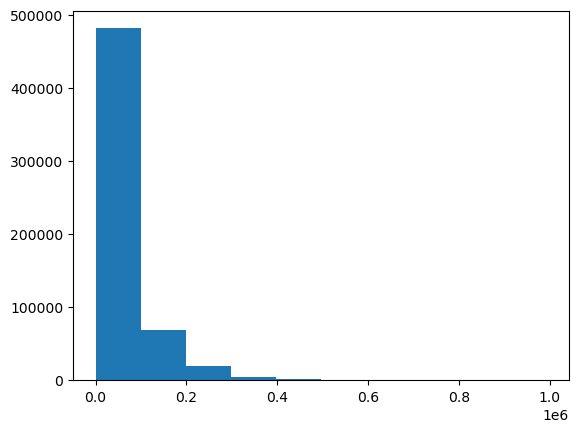

In [11]:
#df0.filter(pl.col('amtinstpaidbefduel24m_4187115A')<=1000000000)
plt.hist(dfstatic0['amtinstpaidbefduel24m_4187115A'],bins=10)

In [15]:
#static_1
dfstatic1 = pl.read_csv(r'homecredit_csv_files/train/train_static_0_1.csv')

In [16]:
dfstatic1 = dfstatic1.with_columns(pl.col("amtinstpaidbefduel24m_4187115A").cast(pl.Float32))


In [18]:
dfstatic = pl.concat([dfstatic0, dfstatic1])

SchemaError: cannot extend/append String with Float64

In [48]:
#applprev_1
df1 = pl.read_csv(r'homecredit_csv_files/train/train_applprev_1_0.csv')

In [49]:
df1

case_id,actualdpd_943P,annuity_853A,approvaldate_319D,byoccupationinc_3656910L,cancelreason_3545846M,childnum_21L,creationdate_885D,credacc_actualbalance_314A,credacc_credlmt_575A,credacc_maxhisbal_375A,credacc_minhisbal_90A,credacc_status_367L,credacc_transactions_402L,credamount_590A,credtype_587L,currdebt_94A,dateactivated_425D,district_544M,downpmt_134A,dtlastpmt_581D,dtlastpmtallstes_3545839D,education_1138M,employedfrom_700D,familystate_726L,firstnonzeroinstldate_307D,inittransactioncode_279L,isbidproduct_390L,isdebitcard_527L,mainoccupationinc_437A,maxdpdtolerance_577P,num_group1,outstandingdebt_522A,pmtnum_8L,postype_4733339M,profession_152M,rejectreason_755M,rejectreasonclient_4145042M,revolvingaccount_394A,status_219L,tenor_203L
i64,f64,f64,str,f64,str,f64,str,f64,f64,f64,f64,str,f64,f64,str,f64,str,str,f64,str,str,str,str,str,str,str,bool,bool,f64,f64,i64,f64,f64,str,str,str,str,f64,str,f64
2,0.0,640.2,null,null,"""a55475b1""",0.0,"""2013-04-03""",null,0.0,null,null,null,null,10000.0,"""CAL""",null,null,"""P136_108_173""",0.0,null,null,"""P97_36_170""","""2010-02-15""","""SINGLE""","""2013-05-04""","""CASH""",false,null,8200.0,null,0,null,24.0,"""a55475b1""","""a55475b1""","""a55475b1""","""a55475b1""",null,"""D""",24.0
2,0.0,1682.4,null,null,"""a55475b1""",0.0,"""2013-04-03""",null,0.0,null,null,null,null,16000.0,"""CAL""",null,null,"""P136_108_173""",0.0,null,null,"""P97_36_170""","""2010-02-15""","""SINGLE""","""2013-05-04""","""CASH""",false,null,8200.0,null,1,null,12.0,"""a55475b1""","""a55475b1""","""a55475b1""","""a55475b1""",null,"""D""",12.0
3,0.0,6140.0,null,null,"""P94_109_143""",null,"""2019-01-07""",null,0.0,null,null,null,null,59999.8,"""CAL""",null,null,"""P131_33_167""",0.0,null,null,"""P97_36_170""","""2018-05-15""","""MARRIED""","""2019-02-07""","""CASH""",false,null,11000.0,null,0,null,12.0,"""a55475b1""","""a55475b1""","""P94_109_143""","""a55475b1""",null,"""D""",12.0
4,0.0,2556.6,null,null,"""P24_27_36""",null,"""2019-01-08""",null,0.0,null,null,null,null,40000.0,"""CAL""",null,null,"""P194_82_174""",0.0,null,null,"""a55475b1""",null,null,"""2019-02-08""","""CASH""",false,null,16000.0,null,0,null,24.0,"""a55475b1""","""a55475b1""","""a55475b1""","""a55475b1""",null,"""T""",24.0
5,0.0,null,null,null,"""P85_114_140""",null,"""2019-01-16""",null,null,null,null,null,null,null,null,null,null,"""P54_133_26""",null,null,null,"""a55475b1""",null,null,null,null,false,null,62000.0,null,0,null,null,"""a55475b1""","""a55475b1""","""a55475b1""","""a55475b1""",null,"""T""",null
6,0.0,1773.8,null,null,"""P94_109_143""",null,"""2018-09-12""",null,0.0,null,null,null,null,15980.0,"""CAL""",null,null,"""P82_154_182""",0.0,null,null,"""a55475b1""",null,null,"""2018-10-12""","""CASH""",false,null,37000.0,null,0,null,11.0,"""a55475b1""","""a55475b1""","""P94_109_143""","""a55475b1""",null,"""D""",11.0
6,0.0,4189.6,null,null,"""P94_109_143""",0.0,"""2017-12-28""",null,0.0,null,null,null,null,32000.0,"""CAL""",null,null,"""P82_154_182""",0.0,null,null,"""P97_36_170""","""2013-09-15""","""SINGLE""","""2018-01-28""","""CASH""",false,null,35000.0,null,1,null,11.0,"""a55475b1""","""a55475b1""","""P94_109_143""","""a55475b1""",null,"""D""",11.0
6,0.0,1110.4,null,1.0,"""a55475b1""",0.0,"""2014-11-18""",null,0.0,null,null,null,null,17380.0,"""COL""",0.0,null,"""a55475b1""",0.0,null,null,"""P97_36_170""","""2012-09-15""","""SINGLE""","""2014-12-18""","""POS""",false,null,14000.0,null,2,0.0,24.0,"""a55475b1""","""a55475b1""","""a55475b1""","""a55475b1""",null,"""D""",24.0
10,0.0,10916.601,"""2019-01-11""",null,"""P73_130_169""",null,"""2019-01-11""",null,0.0,null,null,null,null,100000.0,"""CAL""",null,null,"""P38_65_49""",0.0,null,null,"""P17_36_170""",null,"""MARRIED""","""2019-02-11""","""CASH""",false,null,57000.0,null,0,null,12.0,"""a55475b1""","""a55475b1""","""a55475b1""","""a55475b1""",null,"""T""",12.0
